# Visualizing Training Metrics for Four Models
This notebook visualizes the training loss, training accuracy, and test accuracy for four models using Seaborn. Each metric is plotted as a separate graph with overlayed lines for the models.

In [20]:
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Load training metrics from YAML file
with open('../model_runs/training_metrics.yaml', 'r') as file:
    metrics = yaml.safe_load(file)

In [31]:
# Prepare data for visualization
data = []
for model_name, model_metrics in metrics.items():
    for i, (train_loss, train_acc, test_acc) in enumerate(zip(model_metrics['train_losses'], model_metrics['train_accuracies'], model_metrics['test_accuracies'])):
        data.append({
            'Epoch': i + 1,
            'Train Loss': train_loss,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Model': model_name
        })

# Convert to DataFrame
df = pd.DataFrame(data)
df = df[df['Model'].isin(['standard_CNN',  '16x16','64x64','128x128'])]  # Use .isin() for correct filtering

df['Model'] = df['Model'].replace('standard_CNN', '32x32 (Standard CNN)')
df

,Epoch,Train Loss,Train Accuracy,Test Accuracy,Model
0,1,2.187152,0.673171,0.743506,128x128
1,2,0.539810,0.760163,0.779221,128x128
2,3,0.411353,0.809756,0.814935,128x128
3,4,0.353222,0.855285,0.857143,128x128
4,5,0.328296,0.867480,0.879870,128x128
...,...,...,...,...,...
170,21,0.000407,1.000000,0.954545,32x32 (Standard CNN)
171,22,0.000232,1.000000,0.957792,32x32 (Standard CNN)
172,23,0.000113,1.000000,0.951299,32x32 (Standard CNN)
173,24,0.000078,1.000000,0.954545,32x32 (Standard CNN)


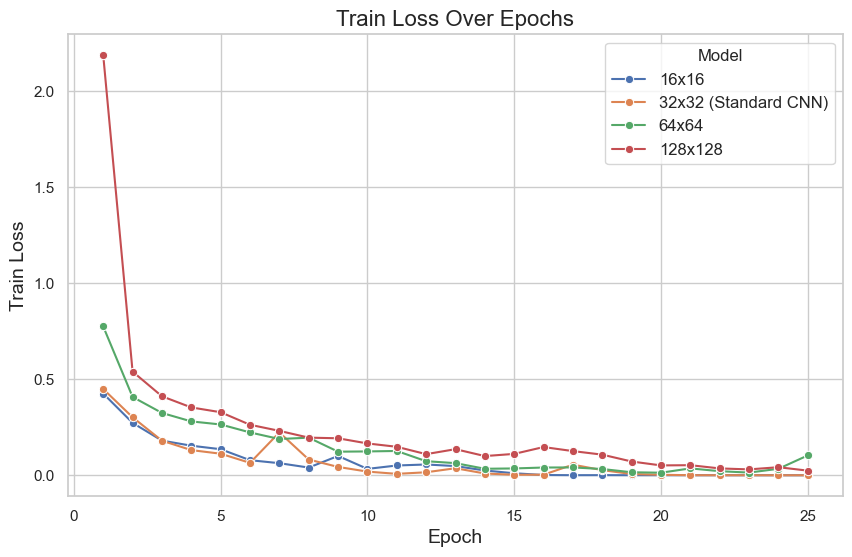

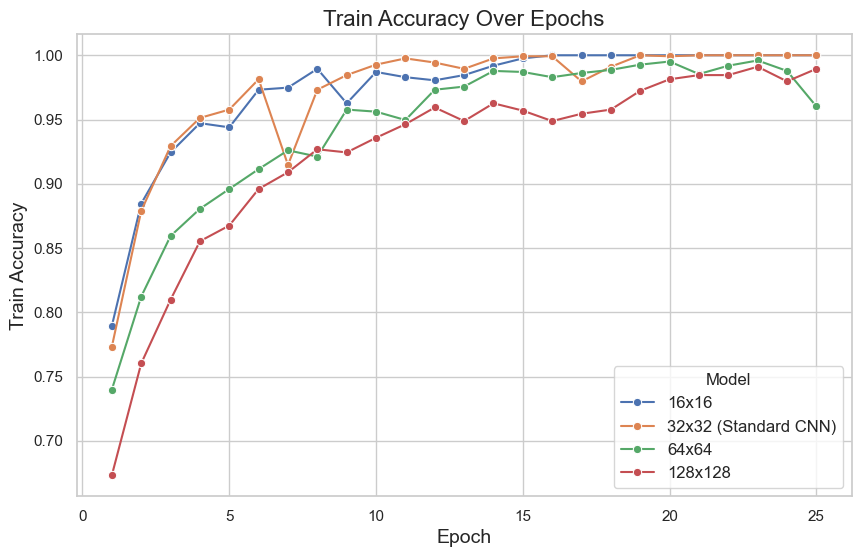

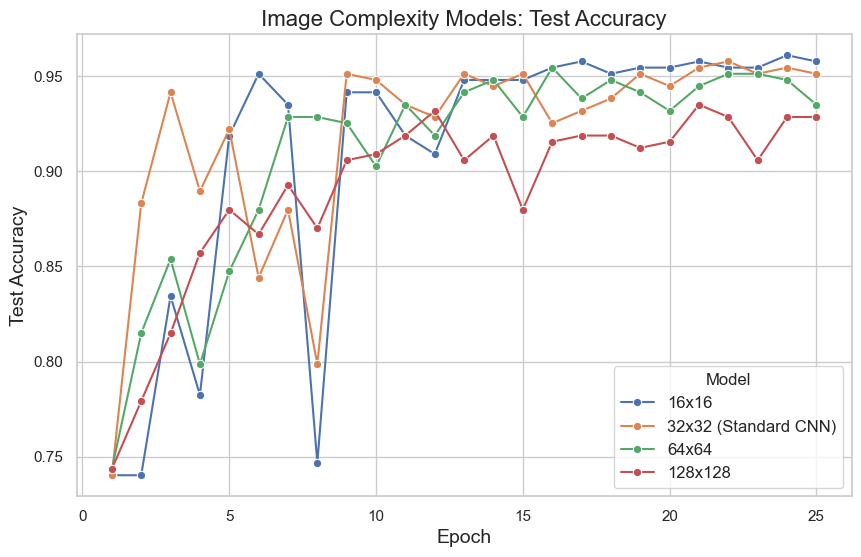

In [33]:
# Set Seaborn style
sns.set(style="whitegrid")

# Define the order of the models for the legend
model_order = ['16x16', '32x32 (Standard CNN)', '64x64', '128x128']

# Plot Train Loss
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epoch', y='Train Loss', hue='Model', hue_order=model_order, marker="o")
plt.title('Train Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.show()

# Plot Train Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epoch', y='Train Accuracy', hue='Model', hue_order=model_order, marker="o")
plt.title('Train Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Train Accuracy', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.show()

# Plot Test Accuracy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epoch', y='Test Accuracy', hue='Model', hue_order=model_order, marker="o")
plt.title('Image Complexity Models: Test Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.legend(title='Model', fontsize=12)
plt.show()